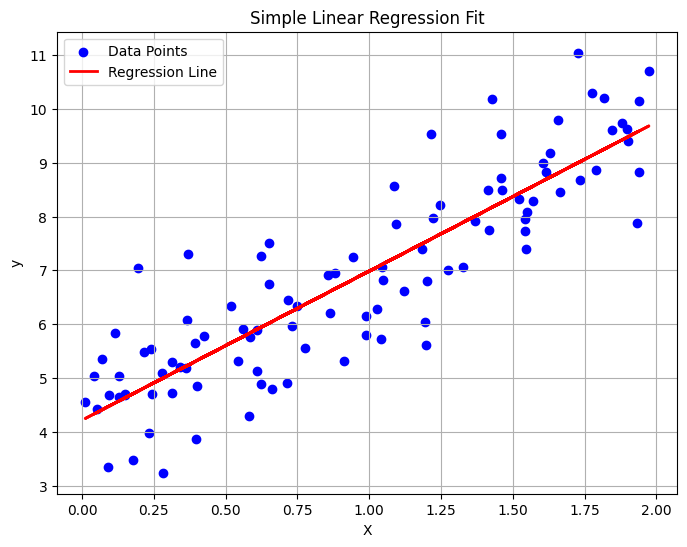

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # true line: y = 4 + 3x + noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


## Implementing Linear Regression from scratch

### Derivatives

$$
\frac{\partial J}{\partial m} = -2 \sum_{i=1}^n x_i \cdot \left( y_i - (mx_i + c) \right)
$$

$$
\frac{\partial J}{\partial c} = -2 \sum_{i=1}^n \left( y_i - (mx_i + c) \right)
$$

* Repeatedly update:

  $$
  m := m - \alpha \cdot \frac{\partial J}{\partial m}
  $$

  $$
  c := c - \alpha \cdot \frac{\partial J}{\partial c}
  $$
* Where $\alpha$ is the **learning rate** (a small number like 0.01)





In [29]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [30]:
# Load dataset
data = load_diabetes()
X = data.data  # shape (442, 10)
y = data.target  # shape (442,)

In [31]:
print(X.shape, y.shape)

(442, 10) (442,)


In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()



In [34]:
# Initialize weights and bias
n_features = X_train.shape[1]
w = np.zeros(n_features)
b = 0

In [35]:
# Training hyperparameters
learning_rate = 0.01
epochs = 5000

In [36]:
# Gradient Descent Training Loop
for epoch in range(epochs):
    # Predictions
    y_pred = X_train.dot(w) + b

    # Compute gradients
    error = y_pred - y_train
    dw = (1 / len(X_train)) * X_train.T.dot(error)
    db = (1 / len(X_train)) * np.sum(error)

    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db

    #print loss every 100 epochs
    if epoch % 1000 == 0:
        mse = np.mean(error ** 2)
        print(f"Epoch {epoch}: MSE = {mse:.4f}")

Epoch 0: MSE = 1.0000
Epoch 1000: MSE = 0.4764
Epoch 2000: MSE = 0.4757
Epoch 3000: MSE = 0.4751
Epoch 4000: MSE = 0.4746


In [37]:
# Evaluate on test set, multiply test data with the model parameters. 
y_pred_scaled = X_test.dot(w) + b
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

test_mse = np.mean((y_pred - y_test) ** 2)


In [38]:
test_mse

np.float64(22887.4197722698)

LinearRegression()